In [1]:
import numpy as np
import pandas as pd

In [2]:
codon_dict = {'TTT': 'Phe', 'TTG': 'Leu', 'TCA': 'Ser', 'TAC': 'Tyr',
              'TGG': 'Trp',
              'CTA': 'Leu',
              'CCC': 'Pro',
              'CAT': 'HIS',
              'CAG': 'Gln',
              'CGA': 'Arg',
              'ATC': 'Ile',
              'ACT': 'Thr',
              'ACG': 'Thr',
              'AAA': 'Lys',
              'AGC': 'Ser',
              'GTT': 'Val',
              'GTG': 'Val',
              'GCA': 'Ala',
              'GAC': 'Asp',
              'GGT': 'Gly',
              'GGG': 'Gly',
              'TTC': 'Phe',
              'TCT': 'Ser',
              'TCG': 'Ser',
              'TGT': 'Cys',
              'CTT': 'Leu',
              'CTG': 'Leu',
              'CCA': 'Pro',
              'CAC': 'HIS',
              'CGT': 'Arg',
              'CGG': 'Arg',
              'ATA': 'Ile',
              'ACC': 'Thr',
              'AAT': 'Asn',
              'AAG': 'Lys',
              'AGA': 'Arg',
              'GTC': 'Val',
              'GCT': 'Ala',
              'GCG': 'Ala',
              'GAA': 'Glu',
              'GGC': 'Gly',
              'TTA': 'Leu',
              'TCC': 'Ser',
              'TAT': 'Tyr',
              'TGC': 'Cys',
              'CTC': 'Leu',
              'CCT': 'Pro',
              'CCG': 'Pro',
              'CAA': 'Gln',
              'CGC': 'Arg',
              'ATT': 'Ile',
              'ATG': 'Met',
              'ACA': 'Thr',
              'AAC': 'Asn',
              'AGT': 'Ser',
              'AGG': 'Arg',
              'GTA': 'Val',
              'GCC': 'Ala',
              'GAT': 'Asp',
              'GAG': 'Glu',
              'GGA': 'Gly'}

In [49]:
df_cr = pd.read_excel(r'J:/疾病相关蛋白密码子/NR.xlsx')

In [50]:
##添加氨基酸列

aa_ls = []
for codon in df_cr['Codon']:
    aa_ls.append(codon_dict[codon])
col_names = df_cr.columns.tolist()
col_names.insert(1,'AA')
df_cr = df_cr.reindex(columns=col_names)
df_cr['AA'] = aa_ls

In [29]:
df_cr

,Codon,AA,OR,DR
0,TTT,Phe,0.9167,0.8893
1,TTG,Leu,0.7803,0.7404
2,TCA,Ser,0.8836,0.8576
3,TAC,Tyr,1.1082,1.1538
4,TGG,Trp,1.0000,1.0000
...,...,...,...,...
56,GTA,Val,0.4964,0.4347
57,GCC,Ala,1.6092,1.6689
58,GAT,Asp,0.9034,0.9005
59,GAG,Glu,1.2067,1.1662


###RSCU直方图

In [51]:
df1 = df_cr[df_cr['AA'].str.contains('Phe')]

In [6]:
import matplotlib.pyplot as plt

In [62]:
df1

,Codon,AA,OR,DR
0,TTT,Phe,0.9714,0.9772
21,TTC,Phe,1.0286,1.0228


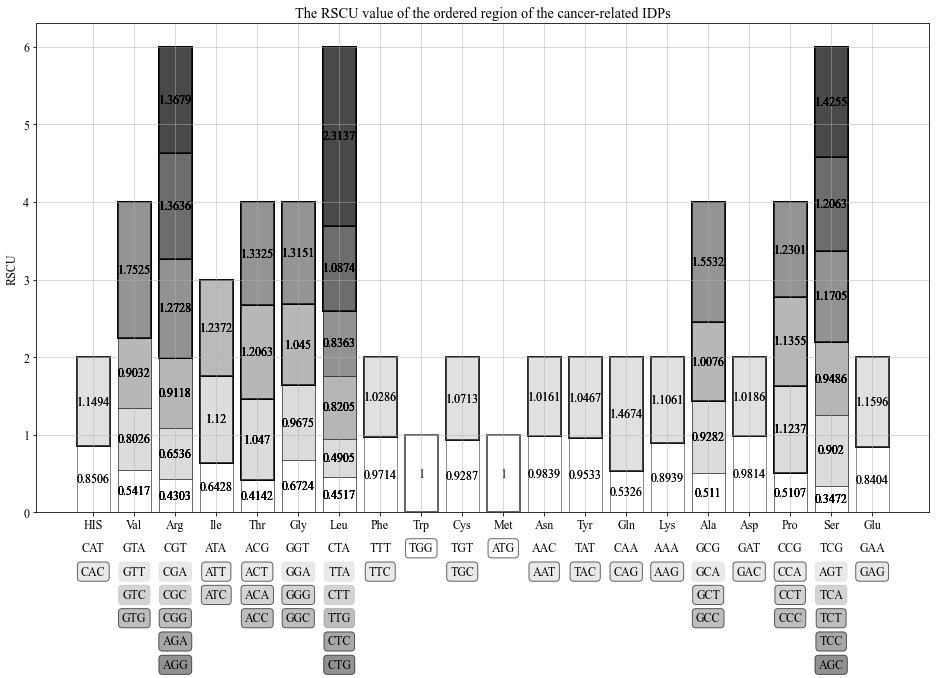

In [47]:
plt.rcParams['font.size'] = 12##设置全局字体大小
plt.rc('font',family='Times New Roman') 
fig = plt.figure(figsize=(16,9))

ax = fig.subplots()


colors_list = plt.colormaps['binary'](
        np.linspace(0, 1, 8))

for aa in set(df_cr['AA']):
    df1 = df_cr[df_cr['AA'].str.contains(aa)]
    ##先对OR画图
    df1 = df1.sort_values(by='OR')
    bar_y=0
    color_num = 0
    text_pos = -0.5
    for each_codon in df1.values:
        bar_y +=each_codon[2]
        if each_codon[2]<1:
            p1 = ax.bar(df1['AA'],each_codon[2],width=0.8,bottom=bar_y-each_codon[2],color=colors_list[color_num],edgecolor="black",alpha=0.6,linewidth=0.5)
            ax.bar_label(p1, label_type='center',fontsize=12,color='black')
            ##1
            text = ax.text(x=each_codon[1],#文本x轴坐标 
                     y=text_pos, #文本y轴坐标
                     s=each_codon[0], #文本内容
                     fontdict=dict(fontsize=12, color='black',family='Times New Roman',),#字体属性字典
                     #添加文字背景色
                     bbox={'facecolor': colors_list[color_num], #填充色
                          'edgecolor':colors_list[color_num],#外框色
                           'alpha': 0.6, #框透明度
                           'boxstyle':'round'
                          },ha='center'

                    )
            text_pos+=-0.3
            color_num+=1
        else:
            p1 = ax.bar(df1['AA'],each_codon[2],width=0.8,bottom=bar_y-each_codon[2],color=colors_list[color_num],edgecolor="k",linewidth=2,alpha=0.6)
            ax.bar_label(p1, label_type='center',fontsize=12,color='black')
            ##1
            text = ax.text(x=each_codon[1],#文本x轴坐标 
                     y=text_pos, #文本y轴坐标
                     s=each_codon[0], #文本内容
                     fontdict=dict(fontsize=12, color='black',family='Times New Roman',),#字体属性字典
                     #添加文字背景色
                     bbox={'facecolor': colors_list[color_num], #填充色
                          'edgecolor':'k',#外框色
                           'alpha': 0.6, #框透明度
                           'boxstyle':'Round'
                          },ha='center'

                    )
            text_pos+=-0.3
            color_num+=1
plt.grid(alpha=0.6)
plt.ylabel('RSCU')
plt.title('The RSCU value of the ordered region of the cancer-related IDPs')
plt.savefig('rscu_cr_or.jpeg',dpi=300,bbox_inches='tight')

##1
# ax.bar(df1['AA'],[1],width=0.35,color=colors_list[0])
# ax.bar(df1['AA'],[2],width=0.35,bottom=[1],color=colors_list[1])
# ax.bar(df1['Codon'],[2],width=0.35,bottom=[1])
# ax.set_ylim([0,6])
# # ax[1].set_xticks([0,1,2],['Phe','TTT','TTC'])

棒形图

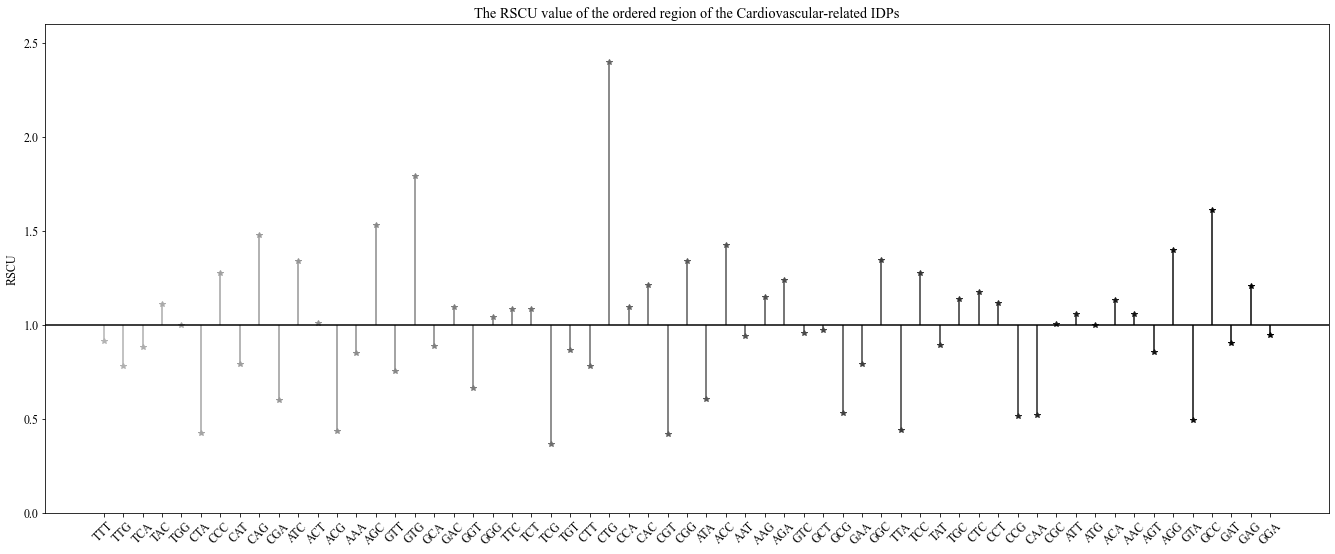

In [34]:
plt.rcParams['font.size'] = 12##设置全局字体大小
plt.rc('font',family='Times New Roman') 
fig = plt.figure(figsize=(23,9))
ax = fig.subplots()

colors_list = plt.colormaps['binary'](
        np.linspace(0.3, 1, 61))
# 绘制棉棒图
i = 0
for stem_x,stem_y in zip(df_cr['Codon'],df_cr['OR']):
    markerline, stemlines, baseline=ax.stem(stem_x,stem_y,markerfmt='*',bottom=1,linefmt='-',basefmt='-')
    plt.setp(markerline, color=colors_list[i])
    plt.setp(stemlines, color=colors_list[i])
    i+=1
ax.axhline(y=1, color='k', linestyle='-')
plt.xticks(rotation=45)
plt.ylim(0,2.6)
plt.ylabel('RSCU')
plt.title('The RSCU value of the ordered region of the Cardiovascular-related IDPs')
plt.savefig('rscu_hr_or.jpeg',dpi=300,bbox_inches='tight')

C:\Users\96526\AppData\Local\Temp/ipykernel_4984/2478052440.py:12: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False,color='black',linestyle=':',linewidth=0.5)


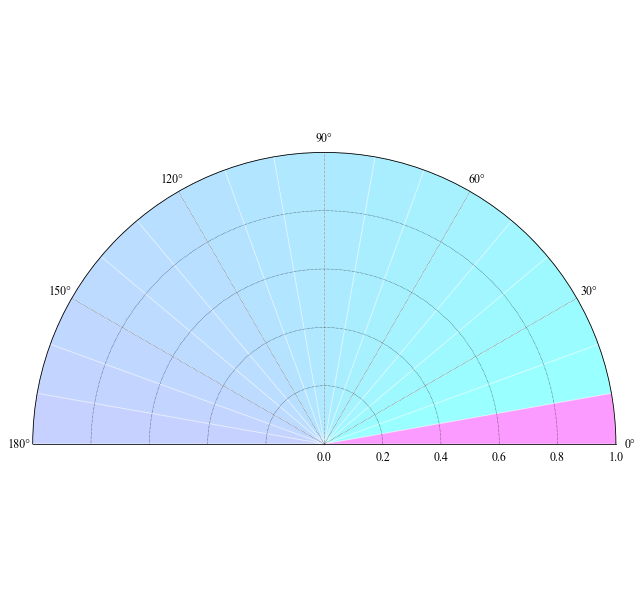

In [180]:
def drawBarOnPolar():
    a=[i*np.pi/18 for i in range(1,37)]
    b =sorted([i for i in range(1,37)],reverse=True)
    width = np.pi / 24
    cs = [plt.cm.cool(i / float(36)) for i in range(36)]
    fig,ax=plt.subplots(figsize=(9,9))
    ax = plt.subplot(111, polar=True)
    # bar图使用polar投影时，在原bar的基础上要加上pi,得到的才是圆中的位置
    ax.bar(a,b,width=np.pi/18, bottom=0.0,alpha=0.4,align='edge',color=cs,edgecolor='white')
    ax.set_xlim(0,np.pi)
    ax.set_ylim(0,1)
    ax.grid(False,color='black',linestyle=':',linewidth=0.5)
    # plt.thetagrids([i*180/np.pi for i in a],b)
    # plt.axis('off')
    plt.subplots_adjust(0.05,0.05,0.95,0.95)
drawBarOnPolar()


C:\Users\96526\AppData\Local\Temp/ipykernel_1244/1675306812.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","0.5","1","1.5",'2','2.5'])
C:\Users\96526\AppData\Local\Temp/ipykernel_1244/1675306812.py:22: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False,color='grey',linestyle='-',linewidth=0.8,alpha=0.4)


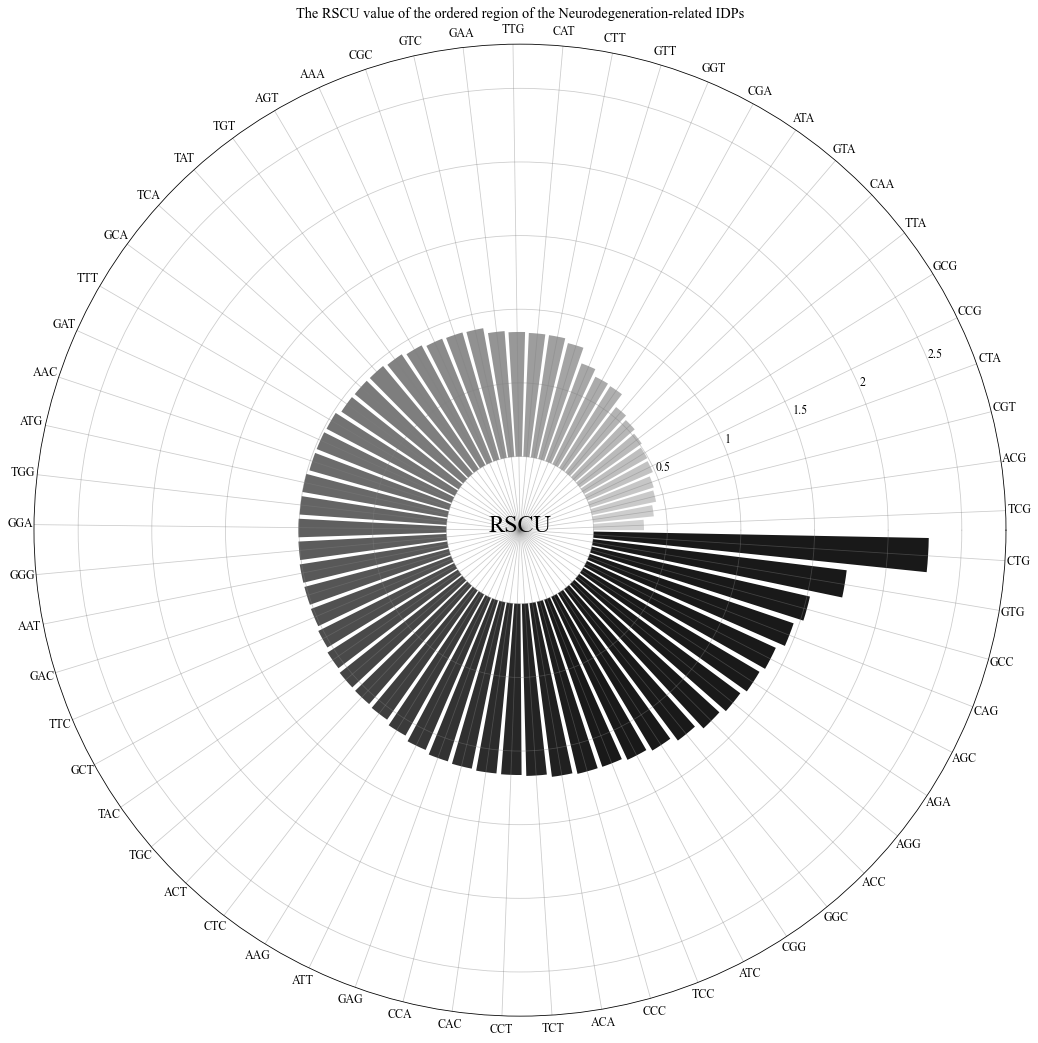

In [51]:
import matplotlib.pyplot as plt
df3=df_cr.sort_values(by='OR')

plt.rcParams['font.size'] = 12##设置全局字体大小
plt.rc('font',family='Times New Roman') 
def drawBarOnPolar():
    a = np.linspace(0,np.pi*2,61,endpoint=False)
    # a=df3['Codon'].tolist()
    b = df3['OR'].tolist()
    # b =sorted([i for i in range(1,55)],reverse=True)
    width = np.pi / 61
    cs = [plt.cm.binary(i / float(61)+0.2) for i in range(61)]
    fig,ax=plt.subplots(figsize=(15,15))
    ax = plt.subplot(111, polar=True)
    # bar图使用polar投影时，在原bar的基础上要加上pi,得到的才是圆中的位置
    ax.bar(a,b,width=np.pi*2/75, bottom=0.5,alpha=0.9,align='edge',color=cs)
    # ax.set_xlim(0,np.pi*2)
    ax.set_ylim(0,3.3)
    # ax.set_yticks(np.arange(0, 3, 0.5))
    ax.set_yticklabels(["","0.5","1","1.5",'2','2.5'])
    ax.text(np.pi*3/2,0.01,'RSCU',ha='center',fontsize=24)
    ax.grid(False,color='grey',linestyle='-',linewidth=0.8,alpha=0.4)
    plt.thetagrids([(i*180/np.pi)+2.3 for i in a],df3['Codon'].tolist())
    plt.subplots_adjust(0.05,0.05,0.95,0.95)
    plt.title('The RSCU value of the ordered region of the Neurodegeneration-related IDPs')
    plt.savefig('rscu_nr_or.jpeg',dpi=300,bbox_inches='tight')
drawBarOnPolar()
